## 🎯 Goal of This Chapter (In Short)

The goal of this practical is to **understand the complete supervised learning workflow using Linear Regression**, including data inspection, model training, prediction, evaluation, and validation.  
It helps learn **how a regression model works, how to judge its reliability using metrics like MSE and R², and when Linear Regression should or should not be used**.


# 1.load the dataset student_scores.csv

In [2]:
import pandas as pd
data=pd.read_csv("student_scores.csv")
data.sample(10)

,name,hours,score,gender,grades,class
30,Param,5,59,M,C,9C
4,Vivaan,7,72,M,B,10B
54,Ritvik,8,77,M,B,10B
59,Zara,8,82,F,A,11B
71,Divit,6,67,M,B,10C
46,Om,7,72,M,B,10A
31,Nidhi,9,87,F,A,12B
41,Mahika,4,51,F,C,9A
48,Shiv,8,83,M,A,11C
14,Yash,6,66,M,B,10C


# 2.inspect the dataset

In [3]:
print("\nDataset info:") 
print(data.info()) # its give the full dataset information 


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB
None


In [7]:
print("columns:",data.columns.tolist()) # to list the columns those are present in the dataset

columns: ['name', 'hours', 'score', 'gender', 'grades', 'class']


In [4]:
data[["hours","score"]].describe() # to check the outliers in the dataset

,hours,score
count,92.000000,92.000000
mean,6.510870,68.836957
std,2.265336,15.692286
min,2.000000,35.000000
25%,5.000000,57.000000
50%,7.000000,70.000000
75%,8.000000,82.000000
max,11.000000,94.000000


In [5]:
data.isnull().sum() # to check the missing values in the given dataset

name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64

In [6]:
print("\nDatatypes:") #to check datatype in the dataset
print(data.dtypes)


Datatypes:
name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object


In [7]:
#6.BIAS Check — Is data skewed toward 1 user group?
print("\n Bais in the dataset:")
print(data["gender"].value_counts(normalize=True)*100)
print(data["grades"].value_counts(normalize=True)*100)
print(data["class"].value_counts(normalize=True)*100)


 Bais in the dataset:
gender
F    51.086957
M    48.913043
Name: proportion, dtype: float64
grades
B    35.869565
A    32.608696
C    19.565217
D     8.695652
F     3.260870
Name: proportion, dtype: float64
class
9A     14.130435
10A    11.956522
9B     10.869565
9C     10.869565
10B     8.695652
11A     8.695652
10C     7.608696
12A     6.521739
12B     6.521739
11B     5.434783
12C     5.434783
11C     3.260870
Name: proportion, dtype: float64


# 3.Dataset specification sheet

##  Dataset Specification Sheet

| **Field**            | **Details** |
|----------------------|-------------|
| **Dataset Name**     | `student_scores.csv` |
| **Description**      | Contains student study behavior and academic performance data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features**         | `name`, `hours`, `score`, `gender`, `grades`, `class` |
| **Target Variable**  | None (Exploratory dataset only) |
| **Number of Rows**   | 92 |
| **Null Handling**    | No missing values detected across any feature |
| **Transformations** | Label encoding applied to `class` → `class_encoded`; datatype validation performed; value distribution and proportion analysis conducted for `gender`, `grades`, and `class` |
| **Owner**            | Student / Notebook Author |
| **Last Updated**     | 2025-12-20 |


# 4.separate features and lables

In [8]:
categorical=data.select_dtypes(include=["object"]).columns
numerical=data.select_dtypes(include=["float64","int64"]).columns
print("categorical:",list(categorical))
print("numerical:",list(numerical))
X = data[["hours"]]
y = data[["score"]]

categorical: ['name', 'gender', 'grades', 'class']
numerical: ['hours', 'score']


# 5.data distribution

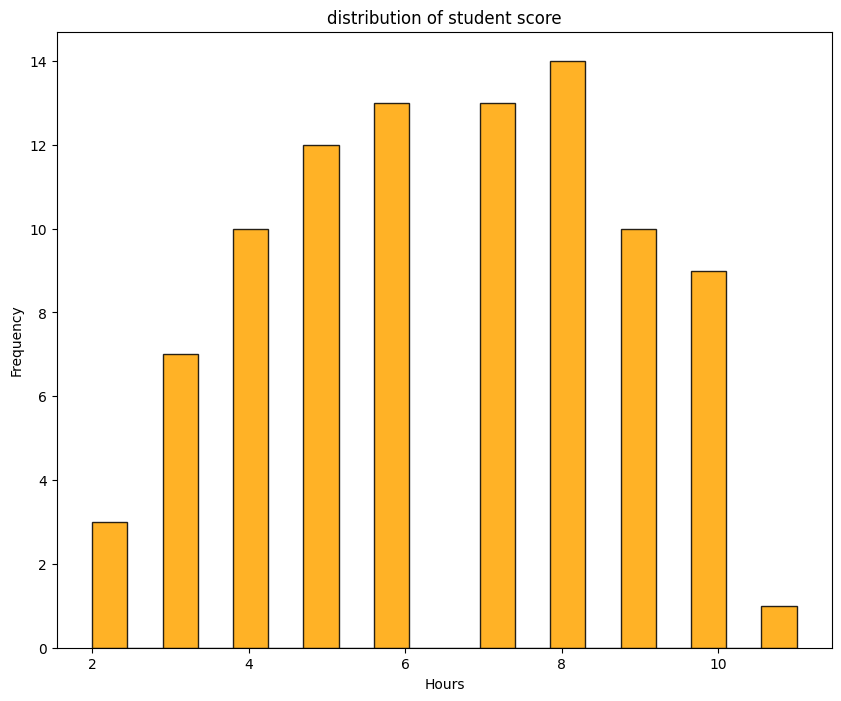

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.hist(X, bins=20,color="orange",edgecolor="black",alpha=0.85)
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("distribution of student score")
plt.show()

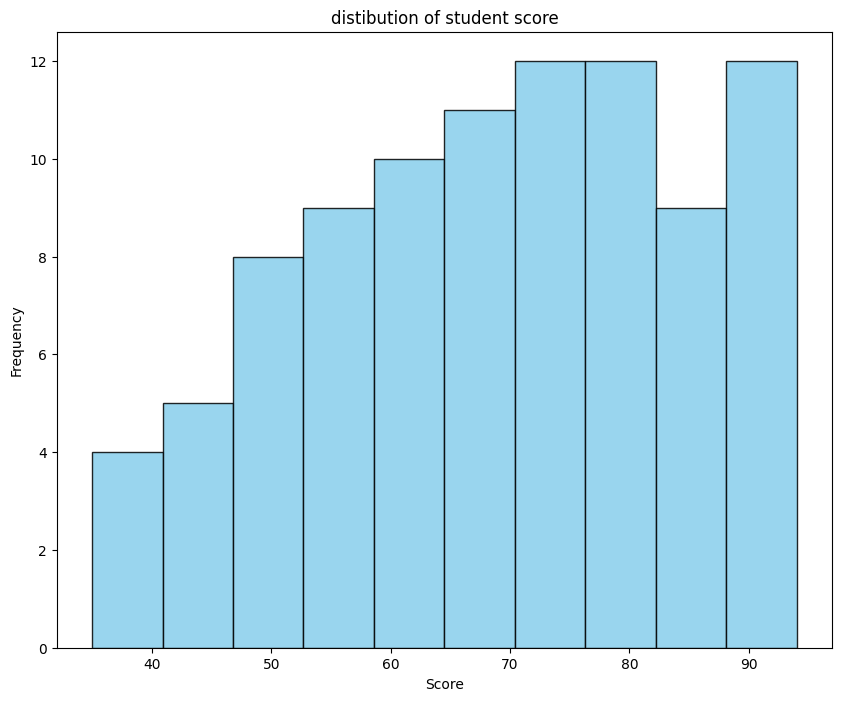

In [12]:
plt.figure(figsize=(10,8))
plt.hist(y, color="skyblue",edgecolor="black",alpha=0.85)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("distibution of student score")
plt.show()


# 6.split data

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
print(X_test)

    hours
40      8
22      9
55      3
72      2
0       8
26      8
39      7
67      9
10      5
44      3
83      5
35      8
89      7
62      3
12      4
4       7
18      6
28     10
49      6


# 7.train the model

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) 


print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)
#The coefficient indicates how much the score increases for every additional hour of study.

Model Coefficient (Slope): [6.80439204]
Model Intercept: [24.61763598]


# 8.Make Predictios

In [16]:
y_pred = model.predict(X_test)

pred_data = {
    'Y_prediction': y_pred.flatten().round(2),
    'Y_test': y_test.values.flatten()
}

prediction_table = pd.DataFrame(pred_data)
prediction_table


,Y_prediction,Y_test
0,79.05,81
1,85.86,84
2,45.03,40
3,38.23,36
4,79.05,76
5,79.05,82
6,72.25,75
7,85.86,85
8,58.64,60
9,45.03,43


In [17]:
y_pred.shape

(19, 1)

# 9.plot the line Regresson

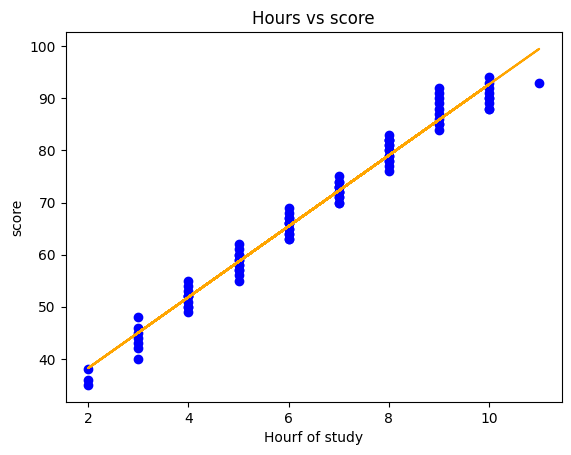

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color="blue")
plt.plot(X, model.predict(X),color="orange")
plt.title("Hours vs score")
plt.xlabel("Hourf of study")
plt.ylabel("score")
plt.show()

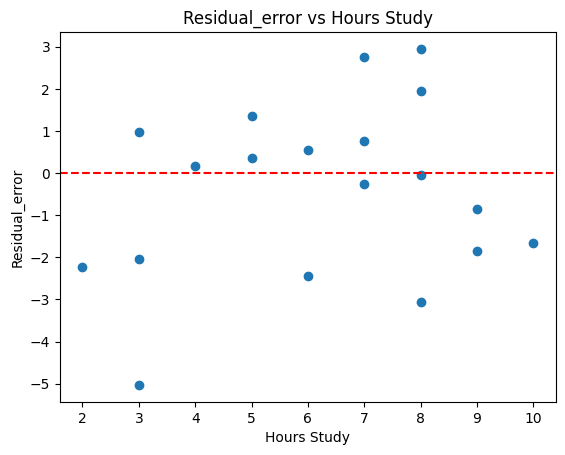

In [19]:
Residual_error = y_test - y_pred
plt.scatter(X_test, Residual_error)
plt.axhline(y=0, color="red",linestyle="--")
plt.xlabel("Hours Study")
plt.ylabel("Residual_error")
plt.title("Residual_error vs Hours Study")
plt.show()


# 10.evaluate the model

In [20]:
from sklearn.metrics import mean_squared_error ,r2_score
import numpy as np
mse = mean_squared_error(y_test ,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test ,y_pred)

print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2 : {r2:.2f}")

MSE : 4.24
RMSE : 2.06
R2 : 0.98


# 11.Actual vs Predicted plot

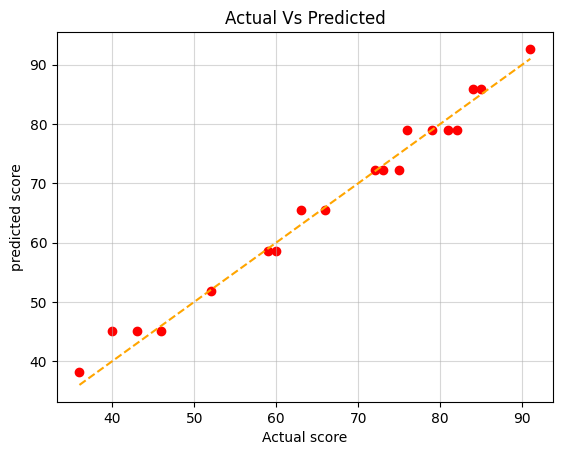

In [21]:
plt.scatter(y_test,y_pred,color="red")
plt.plot([y_test.min(),y_test.max()],
         [y_test.min(),y_test.max()],
         color="orange",linestyle="--")
plt.xlabel("Actual score")
plt.ylabel("predicted score")
plt.title("Actual Vs Predicted")
plt.grid(alpha=0.5)
plt.show()

# 12.Baseline comparison

In [22]:
# Baseline prediction: mean of training scores
baseline_pred = [y_train.mean()] * len(y_test)

baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print("Baseline MSE:", round(baseline_mse, 2))
print("Baseline R² :", round(baseline_r2, 3))

Baseline MSE: 272.91
Baseline R² : -0.034


# Task 

In [24]:
import pandas as pd
data = { 
    "Hours":[1,2,3,4,5,6,7,8,9],
    "Score":[35,43,51,58,69,71,80,85,95]
}
df=pd.DataFrame(data)
print(df)

   Hours  Score
0      1     35
1      2     43
2      3     51
3      4     58
4      5     69
5      6     71
6      7     80
7      8     85
8      9     95


# Split

In [26]:
X = df[["Hours"]]
y = df["Score"]
print("features of Hours:",X.sample(5))
print("features of Score:",y.sample(5))

features of Hours:    Hours
6      7
7      8
8      9
5      6
2      3
features of Score: 1    43
0    35
7    85
2    51
8    95
Name: Score, dtype: int64


# train the model with help of LinearRegression model

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print("slop(coeficent):",model.coef_[0])
print("intersept:",model.intercept_)

slop(coeficent): 7.283333333333335
intersept: 28.805555555555557


# predict the score

y_pred=model.predict(X)
df["predicted_score"] = y_pred.round(2)
print(df)

# Plot the Actual vs Prediction_score

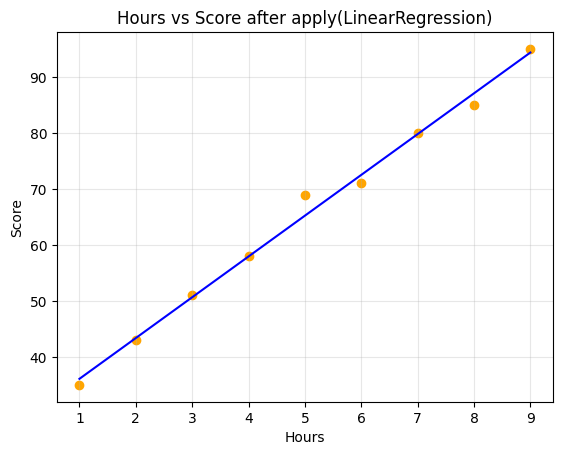

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color="orange",label="Actual")
plt.plot(X, y_pred ,color="blue", label="prediction_line")
plt.title("Hours vs Score after apply(LinearRegression)")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.grid(alpha=0.3)
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("\n ModelEvaluation:")
print("mean_squared_error:",round(mse,3))
print("r2_score:",round(r2,3))


 ModelEvaluation:
mean_squared_error: 2.527
r2_score: 0.993


In [49]:
hours = [[5]]
predicted_score = model.predict(hours)

print("Predicted Score for 5 hours:", round(predicted_score[0], 2))


Predicted Score for 5 hours: 65.22


C:\Users\Vijay\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
hours = [[12]]
predicted_score = model.predict(hours)

print("Predicted Score for 12 hours:", round(predicted_score[0], 2))


Predicted Score for 12 hours: 116.21


C:\Users\Vijay\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
